# Psychometric Functions

In [ ]:
# Start writing code import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from sympy import *
from cProfile import label  

N_r = 30

stimulus_intensity = [5, 10, 15, 20, 25, 30] 
I_s = np.array(stimulus_intensity)
number_of_correct_responses = [12, 11, 19, 27, 30, 30] 
N_c = np.array(number_of_correct_responses)
P_c = N_c/N_r #Probability of right answer for each stimulus intensity 
P_guess = 1/3 #Since there are 3 classes, the probability is 1/3

In [ ]:
from scipy.optimize import minimize

def NLL_psycho(parameters):
    c = parameters[0]
    sigma = parameters[1]
    L = 0
    for i in range(len(stimulus_intensity)):
        P_s = norm.cdf((stimulus_intensity[i]-c)/sigma)
        log_NS = 0
        log_ns = 0
        log_Nns = 0
        for j in range(N_r):
            log_NS += np.log(j+1)
        for j in range(N_c[i]):
            log_ns += np.log(j+1)
        for j in range(N_r - N_c[i]):
            log_Nns += np.log(j+1)
        if N_r - N_c[i] == 0:
            L += log_NS - log_ns - log_Nns + N_c[i]*np.log(P_s)
        else:
            L += log_NS - log_ns - log_Nns + N_c[i]*np.log(P_s) + (N_r - N_c[i]) * np.log(1 - P_s)
    return -L
        
res = minimize(NLL_psycho, np.array([15, 5]), method='L-BFGS-B')
print(res)
res.fun

      fun: 11.315347372636607
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.77635669e-07, -1.77635669e-07])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 33
      nit: 10
     njev: 11
   status: 0
  success: True
        x: array([10.13184841,  8.19082702])


11.315347372636607

In [ ]:
def NLL_HT(parameters):
    c = parameters[0]
    sigma = parameters[1]
    L = 0
    for i in range(len(stimulus_intensity)):
        x = norm.cdf((stimulus_intensity[i]-c)/sigma)
        P_s = x + (1 - x)*P_guess
        log_NS = 0
        log_ns = 0
        log_Nns = 0
        for j in range(N_r):
            log_NS += np.log(j+1)
        for j in range(N_c[i]):
            log_ns += np.log(j+1)
        for j in range(N_r - N_c[i]):
            log_Nns += np.log(j+1)
        if N_r - N_c[i] == 0:
            L += log_NS - log_ns - log_Nns + N_c[i]*np.log(P_s)
        else:
            L += log_NS - log_ns - log_Nns + N_c[i]*np.log(P_s) + (N_r - N_c[i]) * np.log(1 - P_s)
    return -L
        
res = minimize(NLL_HT, np.array([15, 5]), method='L-BFGS-B')
print(res)
res.fun

      fun: 7.637350852186628
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.15463185e-06, -1.59872117e-06])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 24
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([15.69202729,  3.77808381])


7.637350852186628

[0.2654816622123145, 0.49357844176838833, 0.7238582550064547, 0.8858560453137289, 0.9652549365448729, 0.9923596872502354]
[0.33488486722297145, 0.37730514781402025, 0.6182218107310878, 0.9152730789706359, 0.9954159841307302, 0.9999491943422207]


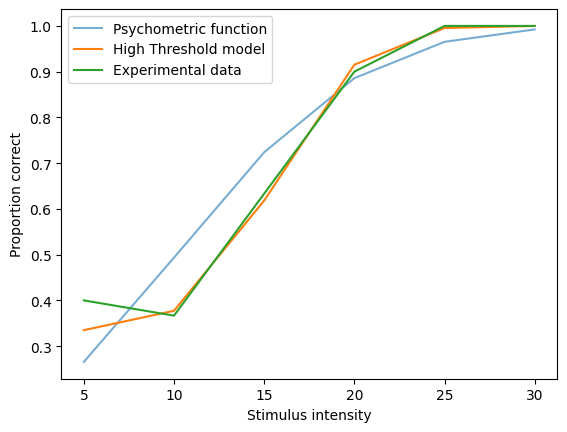

In [ ]:
c_psy, c_ht = 10.131849, 15.69202769
sigma_psy, sigma_ht = 8.19082648, 3.77808342
P_s_psy = []
P_s_th = []
for i in range(len(stimulus_intensity)):
    P_spsy = norm.cdf((stimulus_intensity[i]-c_psy)/sigma_psy)
    x = norm.cdf((stimulus_intensity[i]-c_ht)/sigma_ht)
    P_sht = x + (1 - x)*P_guess
    P_s_psy.append(P_spsy)
    P_s_th.append(P_sht)

print(P_s_psy)
print(P_s_th)

plt.plot(stimulus_intensity, P_s_psy,  alpha=0.6, label='Psychometric function')
plt.plot(stimulus_intensity, P_s_th, label= 'High Threshold model')
plt.plot(stimulus_intensity, P_c, label = 'Experimental data')
plt.xlabel('Stimulus intensity')
plt.ylabel('Proportion correct')
plt.legend()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0153691c-15dd-4c7c-b94c-78660e6bf471' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>